### Machine Learning definition:

- Science of programming computers so they can learn from data
- Eg: Spam Filter - learning to flag mails spams
- Training data: from which the computer learns
- Testing data: on which the machine learning model is tested
- Accuracy: Performance measure, ratio of correct classification by all classification

### Machine Learning use:

- problems requiring fine tuning
- problems that are too complex for the traditional approches
- fluctuating environment: new data can change the model
- insights for large and complex data

### Applications

- **Image classification**:
     - Classifying products from a manufacturing line
     - Detecting tumors in brain scans
- **NLP (Natural Language Processing)**
     - classify news articles
     - Flagging offensive comments
     - Summarizing documents
     - Chatbots
- **Regression** 
     - Forecasting revenue
- **Speech Recognition**
     - App reacting to voice commands
- **Anomaly detection**
     - Credit card Fraud detection
     - wrong entries in the tranasaction data
- **Clustering**
     - Customer segmentation
- **Recommendar System**
     - Recomment music/books/movies based on previous history
     - predict next purchase based on past transaction histroy
- **Reinforcement Learning**
     - AlphaGo  
         
-----------------

### Types of Machine Learning Systems

#### Based on Data

1. **Supervised**
    - Training data has Lables
    - Classification/ Regression problems
    - Important Supervised learning algorithms
        - K-nearest neighbors
        - Linear Regression
        - Logistic Regression
        - Support Vector Machines (SVMs)
        - Decision Trees and Random Forest 
        - Neural Networks

2. **Unsupervised**
    - Unlabeled data
    - Important unsupervised learning algorithms
        - **Clustering**
            - K-means
            - DBSCAN
            - Hierarchical cluster analysis (HCA)
        - **Anomaly Detection and novelty detectionb**
            - *amonaly detection- removing suspicious data, detecting fradualnt data points*
            - *novelty detection- detect new instances that look different from all instances in the training sets*
            - One class SVM
            - Isolation Forest
        - **Visualization and dimensionality reduction**
            - *Simplifying data without losing too much information/feature extraction*
            - Principal component analysis (PCA)
            - Kernet PCA
            - Locally linear Embedding (LLE)
            - t-distributed stochastic neighbor embedding (t-SNE)
        - **Association rule Learning**
            - *to dig into large amounts of data and discover interesting relations between attributes*
            - Apriori
            - Eclat

3. **Semisupervised**
    - partial labeled and partial unlabeled data
    - Algorithms
        - *combination of both supervised and unsupervised algorithms*
            - Deep belief networks (DBNs) (based on unsupervised components, restricted boltzmann machines (RBMs), fine tuned using supervised learning techniques)                           

4. **Reinforcement Learning**
    - agent: learning system
    - accuracy - rewards (positive), penalty (negative)
    - policy - best strategy (get most rewards)

#### Incremental Learning

1. **Online**
    - Incremental learning, feeding it data instance sequentially
    - model learns as the data arrives 
    - great when the data changes rapidly, and with limited computing resources
    - **out of core learning**: huge datasets that cannot fit one systems memory
    - **learning rate**: how fast the online learning system adapt to changing data
        -high learning rate: adapts quickly to new information, forgets old information quickly
        -low learning rate: learns slowly, less sensitive to noise and outliers 
    - con: if bad data is fed, the accuracy declines; Constant monitoring required

2. **Batch Learning**
    - system is incapable of learning incrementally, must by trained with all available data
    - offline learning
    - need to replace the old data with new data for retraining; can be automated
    - New learning can require huge system comsumption and time as well

#### Learning Based (How the models generalize)

1. **Instance Based**
    - system learns the patterns and identifies the similarity measure to compare the test data

2. **Model Based**
    - to build model from training set and apply the model to new data to make predictions
    


----------
----------
Example - Model Based Learning  (deviating from the book)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Date downloded from the links in the books
bli_data = pd.read_csv("datasets\\ch1_bli_data.csv", thousands=r',')
weo_data = pd.read_csv("datasets\\ch1_weo_data.csv", thousands=r',')

In [3]:
bli_data.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [4]:
bli_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               2369 non-null   object 
 1   Country                2369 non-null   object 
 2   INDICATOR              2369 non-null   object 
 3   Indicator              2369 non-null   object 
 4   MEASURE                2369 non-null   object 
 5   Measure                2369 non-null   object 
 6   INEQUALITY             2369 non-null   object 
 7   Inequality             2369 non-null   object 
 8   Unit Code              2369 non-null   object 
 9   Unit                   2369 non-null   object 
 10  PowerCode Code         2369 non-null   int64  
 11  PowerCode              2369 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  2369 non-null   float64
 15  Flag

In [5]:
bli_data.Indicator.unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [6]:
## Extracting Life satisfaction from bli_data
bli_data = bli_data[['Country', 'Value']][bli_data['Indicator'] == 'Life satisfaction']
bli_data.head(5)

,Country,Value
1813,Australia,7.3
1814,Austria,7.1
1815,Belgium,6.9
1816,Canada,7.4
1817,Czech Republic,6.7


In [7]:
weo_data.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0


In [8]:
##Extracting GDP from WEO data 
weo_data = weo_data[['Country','2015']]

In [9]:
weo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  190 non-null    object 
 1   2015     187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [10]:
##Remove null GDP (2015) data
weo_data.dropna(axis=0,inplace=True)

In [11]:
weo_data.head(5)

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.380
2,Algeria,4318.140
3,Angola,4100.320
4,Antigua and Barbuda,14414.300


In [12]:
## Renaming the columns
weo_data = weo_data.rename(columns={"2015":"GDP per capita (USD)"})
bli_data = bli_data.rename(columns={"Value":"Life satisfaction"})
print(weo_data.head(5))
print(bli_data.head(5))

               Country  GDP per capita (USD)
0          Afghanistan               599.994
1              Albania              3995.380
2              Algeria              4318.140
3               Angola              4100.320
4  Antigua and Barbuda             14414.300
             Country  Life satisfaction
1813       Australia                7.3
1814         Austria                7.1
1815         Belgium                6.9
1816          Canada                7.4
1817  Czech Republic                6.7


In [13]:
## Checking counts before joining
print(bli_data.shape)
print(weo_data.shape)

(168, 2)
(187, 2)


In [14]:
weo_data['GDP per capita (USD)'].max()

101994.09

In [15]:
##Filtering based on book graph limits
weo_data = weo_data[:][weo_data['GDP per capita (USD)'] <= 60000]

In [16]:
## Checking counts before joining
print(bli_data.shape)
print(weo_data.shape)

(168, 2)
(183, 2)


In [17]:
table_data = pd.merge(weo_data, bli_data, how='inner', on='Country').groupby('Country').mean()
table_data.head(5)

,GDP per capita (USD),Life satisfaction
Country,,
Australia,50961.87,7.350
Austria,43724.03,7.225
Belgium,40106.63,7.000
Brazil,8670.00,6.400
Canada,43331.96,7.425


(0.0, 10.0)

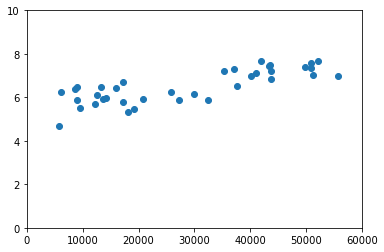

In [18]:
#Ploting scatter plot for the values
plt.scatter(table_data['GDP per capita (USD)'],table_data['Life satisfaction'])
plt.xlim(0, 60000)
plt.ylim(0,10)

#### life_satisfaction = θ<sub>0</sub> + θ<sub>1</sub>× GDP_per_capita

In [19]:
## Applying linear Model
import sklearn.linear_model
model_ch1 = sklearn.linear_model.LinearRegression()

In [20]:

x= table_data['GDP per capita (USD)'].values.reshape(-1, 1)
y= table_data['Life satisfaction'].values.reshape(-1, 1)

In [21]:
print(x.shape)
print(y.shape)

(37, 1)
(37, 1)


In [22]:
## train and test split (deviating from the book)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [23]:
## Fitting the model
model_ch1.fit(X_train,y_train)

LinearRegression()

In [24]:
#Predicting values for x_test
y_pred = model_ch1.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.4726178476679682

In [29]:
## Example from the book
X_new = [[22587]] 
print(model_ch1.predict(X_new))

[[6.23154076]]


(0.0, 10.0)

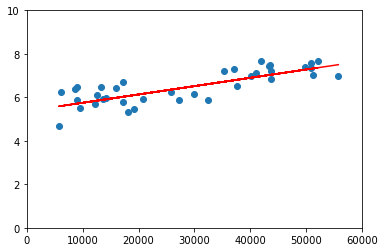

In [30]:
## Add the model as trendline in the above plot 
Y_pred = model_ch1.predict(x)
plt.scatter(table_data['GDP per capita (USD)'],table_data['Life satisfaction'])
plt.plot(x,Y_pred,color = 'red')
plt.xlim(0, 60000)
plt.ylim(0,10)

#### Process Summary:

- Data Exploration (Understanding the data)
- Model Selection (Based on data visualization)
- Model Training (Minimizing the cost function, here: predicted value deviation from actual value)
- Predicting values for new data using the model
    

-----------------
----------------

### Main Challenges in Machine Learning

- two things that can go wrong 
    - bad algorithms
    - bad data

**Bad Data**
- Insufficient quantity of training data
- Non representative training data 
    - to generalize, we need representative data for all cases in test
    - true for both instance based and model based learning 
    - poor accuracy for non representative data
    - Sampling noise: sample is too small
    - sampling bias: large data, but nonrepresentative of all cases
- Poor Quality of data
    - Data containing errors, outliers, and noise
    - outliers shall be removed
- Irrelevant Features
    - Selection of relevant feature / adding relevant features:
        - Feature Selection
        - Feature Extraction
        - Creating new features

**Bad Algorithms**

1. **Overfitting the training data**
    - model performs well on training data, but doesn't generlize well
    - To solve:
         - Simplify the model
         - Add more training data
         - reduce noise in training data (fix errors and remove outliers)
         
2. **Underfitting the training data**
     - model is too simple
     - to solve:
         - select more powerful algo, with more parameters
         - feed better features
         - reduce constraints on the model

---------------
---------------
### Testing and Validating

- Divide the set into 2 sets; training set and testing set. 
- The error in predicting the testing set values is the generalization error (or out of sample error)


#### Hyperparameter tuning and model selection

- hyperparameter tuning for avoiding overfitting
- **holdout validation**: hold some part of data for validation, select the model that performs well on the validation set. Then train the model on full training set and test on the testing set
    - issues
        - *validation set is too small:* model evaluations will be imprecise
        - *validation set is too large:* training set is too small than full training set
- **Cross Validation**
    - repeated validation on same training data with a different set of data selected for validation on each run

#### Data Mismatch

- all levels of data must be present in the training and validation dataset

---------------
---------------
## Exercises


**1. How would you define Machine Learning?**

System that can learn from data by finding patterns and dependency among different parameters, and extend it to predict values for unknown set. 

**2. Can you name four types of problems where it shines?**
- Complex patterns
- Fluctuating data
- data mining 
- hand tuned rule

**3. What is a labeled training set?**

The training data where we know the target variable, or know the level of the target variables to predict. / The training data where the nature of target variable or the dependent variable is known

**4. What are the two most common supervised tasks?**
- Regression
- Classification

**5. Can you name four common unsupervised tasks?**
- Clustering
- Visualization
- Association rule learning
- Dimensionality reduction

**6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?**

Reinforcement learning

**7. What type of algorithm would you use to segment your customers into multiple groups?**

Clustering algorithms

**8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?**

Supervised

**9. What is an online learning system?**

The model learns with the new data as soon as it comes and doesn't rely on relearning everything from scratch. It learns from data in small batches.

**10. What is out-of-core learning?**

Out of core learning is the huge data which cannot be run on one machine

**11. What type of learning algorithm relies on a similarity measure to make predictions?**

instance based

**12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?**

hyperparameter: for learning tuning

**13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?**

- model based learning fit the model to find the parameters of the model that can be generalized to the new data
- minimizing cost function
- to make predctions, the new values of data is fed in the model and the predicted value is reported


**14. Can you name four of the main challenges in Machine Learning?**
- bad data
    - error in data
    - outliers
    - non representive data
    - irrelvant features
- bad algorithms
    - overfitting the model to particular dataset
    - underfitting the model to particular data due to lack of data 

**15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?**

Overfitting, solutions: 
     - to simplify the mode
     - to add more training data
     - to fix errors and remove outliers 

**16. What is a test set, and why would you want to use it?**

Test set is same as training set with same nature of data, except the target variable. We use it to check the accuracy of the model and to validate the model.

**17. What is the purpose of a validation set?**

to compare the models and their performance. To select the best model and tune the hyperparameters

**18. What is the train-dev set, when do you need it, and how do you use it?**

the train-dev is a validation set that is taken from a broad training set after performing the train/validation/test split. helps when the test set is a part of the broad variation of test set. so we create a train-dev set with similar variables in order to avoid misrepresentation of other category/combinations.

We train the model on the training data set, we evaluate on train-dev and validation, 
- if model performs badly on both, we have an overfitting case, 
- if the model performs good in train-dev and badly on validation we have a data mismatch we the learning doesn't generalize to our specific production data.


**19. What can go wrong if you tune hyperparameters using the test set?**

overfitted model - might not generalize to new data very well.  